In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn

In [5]:
# Graph density and model performance data
graph_degree = np.array([1.2857, 1.1737, 1.1170, 1.1528]).reshape(-1, 1)
graph_complexity = np.array([133*171, 616*723, 436*487, 144*166])
graph_density = np.array([0.0194, 0.0038, 0.0051, 0.015])
no_positive_runs = np.array([63, 9, 43, 0])

## Linear Regression

In [57]:
# Create and fit the linear regression model for DRL Performance
model_linear_drl = LinearRegression()
model_linear_drl.fit(graph_density, no_positive_runs)

# Predict values for plotting the regression line
drl_linear_pred = model_linear_drl.predict(graph_density)

: 

## Plotting

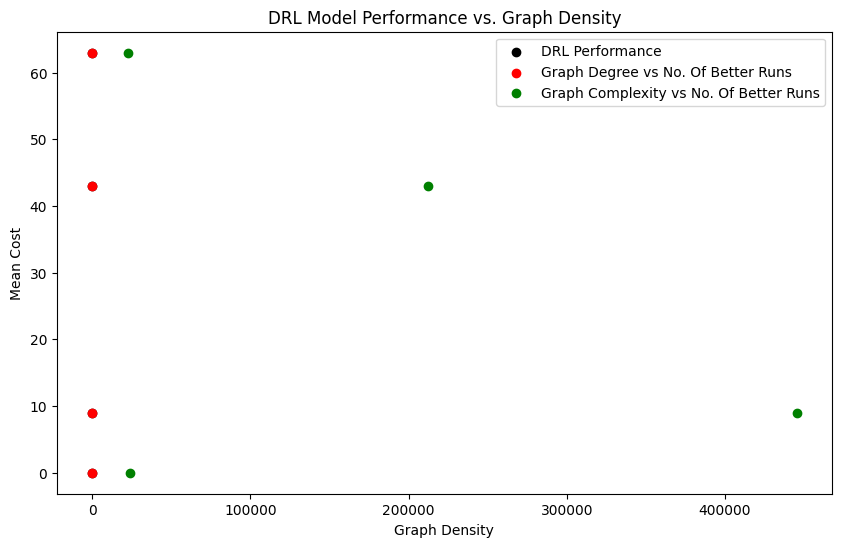

In [7]:
# Regression Plotting
plt.figure(figsize=(10, 6))

plt.scatter(graph_density, no_positive_runs, color='black', label='DRL Performance')
plt.scatter(graph_degree, no_positive_runs, color='red', label='Graph Degree vs No. Of Better Runs')
plt.scatter(graph_complexity, no_positive_runs, color='green', label='Graph Complexity vs No. Of Better Runs')

# plt.plot(graph_density, drl_linear_pred, color='blue', linestyle='-', label='DRL Linear Regression Line')

plt.xlabel('Graph Density')
plt.ylabel('Mean Cost')
plt.title('DRL Model Performance vs. Graph Density')
plt.legend()
plt.show()

[0.00974026 0.00190846 0.00256775 0.00806138]
[1.28571429 1.1737013  1.11697248 1.15277778]


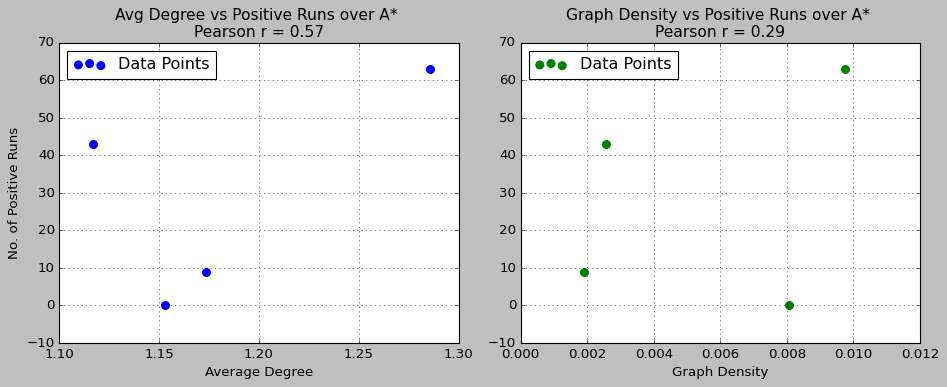

Correlation between Average Degree and No. of Positive Runs over A*: 0.565
Correlation between Graph Density and No. of Positive Runs over A*: 0.292


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Data
nodes = np.array([133, 616, 436, 144, 616, 163])
edges = np.array([171, 723, 487, 166, 723, 170])
labels = ["Env 1", "Env 2", "Env 3", "Env 4", "Env 5", "Env 6"]

def graph_density(edges, nodes):
    return (edges) / (nodes * (nodes - 1))

def average_degree(edges, nodes):
    return (edges) / nodes

# Compute graph density and average degree
density = graph_density(edges, nodes)
avg_degree = average_degree(edges, nodes)
no_positive_runs = np.array([63, 9, 43, 0, 2, 0])
mean_difference = np.array([22.158 - 22.145, 49.519 - 45.854, 37.005 - 44.12, 20.038 - 20.755, 34.458 - 47.443])

print(density)
print(avg_degree)

# Pearson Correlation
corr_degree, _ = pearsonr(avg_degree, no_positive_runs)
corr_density, _ = pearsonr(density, no_positive_runs)

# Apply academic style using seaborn
plt.style.use('classic')

# Create scatter plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for average degree
ax[0].scatter(avg_degree, no_positive_runs, color='blue', s=50, label='Data Points')
ax[0].set_xlabel('Average Degree', fontsize=12)
ax[0].set_ylabel('No. of Positive Runs', fontsize=12)
ax[0].set_title(f'Graph Density vs Positive Runs over A*', fontsize=14)
ax[0].grid(True)
ax[0].legend(loc='upper left')

# Scatter plot for graph density
ax[1].scatter(density, no_positive_runs, color='green', s=50, label='Data Points')
ax[1].set_ylabel('Mean diff with A*', fontsize=12)
ax[1].set_title(f'Graph Density vs Positive Runs over A* \nPearson r = {corr_density:.2f}', fontsize=14)
ax[1].grid(True)
ax[1].legend(loc='upper left')

# Add tight layout
plt.tight_layout()

# Show the plot
plt.savefig("high_quality_plot.png", dpi=300, bbox_inches='tight', format='png')
plt.show()
# Print correlation values for further reference
print(f"Correlation between Graph Density and No. of Positive Runs over A*")
print(f"Correlation between Graph Density and Mean Diff with A* Search")